In [1]:
import numpy as np
import pandas as pd
import random
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure2/output_fig2/'
from scripts.io_library import MyLib
from scripts.utils import Utils
from scripts.visualization import MyVisualization

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

# Prepare data

In [3]:
gene_effect_file = 'Main_Data/CRISPR/CRISPR.csv'
gene_effect_df = MyLib.load_csv(gene_effect_file, index_col=0)
gene_effect_df = gene_effect_df.T
gene_effect_df = gene_effect_df.dropna(axis=1)

upset_file = 'cell_lines_master_upset_2025-2-24.csv'
raw_upset_df = MyLib.load_csv(upset_file, index_col=0)
# raw_upset_df.set_index('Cell_line', inplace=True, drop=True)
upset_df = raw_upset_df[(raw_upset_df['CRISPR']==1) & (raw_upset_df['Subtype'] != 'HCC')]
upset_df = upset_df[["Subtype", 'DepMap_ID', 'RNA']]
print('upset shape:', upset_df.shape)
gene_effect_df = gene_effect_df.loc[upset_df.index,:]

ccle_cripsr_file = 'Additional_Data/DepMap/CRISPRGeneEffect.csv'
ccle_cripsr_df = MyLib.load_csv(ccle_cripsr_file, index_col=0)

input_data/Main_Data/CRISPR/CRISPR.csv  is loaded, shape:  (18443, 60)

input_data/cell_lines_master_upset_2025-2-24.csv  is loaded, shape:  (87, 11)

upset shape: (39, 3)
input_data/Additional_Data/DepMap/CRISPRGeneEffect.csv  is loaded, shape:  (1100, 18443)



In [4]:
mut_dir = 'Main_Data/Mutations/subset/'
hotspot_df = MyLib.load_csv(os.path.join(mut_dir, 'Mut_Hot.csv'), index_col=0).T.astype('int64')
dam_df = MyLib.load_csv(os.path.join(mut_dir, 'Mut_Dam.csv'), index_col=0).T.astype('int64')
hotspot_df[hotspot_df > 1] = 1
dam_df[dam_df > 1] = 1
genes = [ 'ERBB2 (2064)', 'BRAF (673)', 'IDH1 (3417)', 'KRAS (3845)', 'AKT1 (207)', 'PIK3CA (5290)', 'CTNNB1 (1499)']
for gene in genes:
    upset_df = Utils.get_cell_lines_by_hotspot_dam_mutation(gene, hotspot_df, dam_df, upset_df)
fusion_df = MyLib.load_csv('main_data/Fusion/Fusion.csv')
cell_lines = Utils.get_cell_lines_by_fusion(fusion_df, upset_df, 'FGFR2')
upset_df.loc[cell_lines, 'FGFR2 (2263)'] = 1
upset_df['FGFR2 (2263)'] = upset_df['FGFR2 (2263)'].fillna(0)
cnv_file = 'Additional_Data/Selected_Lists/goi_cnv.csv'
cnv_df = MyLib.load_csv(cnv_file)
cell_lines_dic = Utils.get_cell_lines_by_cnv(cnv_df, upset_df, 'ERBB2')
for k in cell_lines_dic:
    print(f'CNV: {k}, cell: {cell_lines_dic[k]}')
    upset_df.loc[cell_lines_dic[k], 'ERBB2 (2064)'] = 1
MyLib.save_csv(upset_df, 'upset_mutations_df.csv')

input_data/Main_Data/Mutations/subset/Mut_Hot.csv  is loaded, shape:  (467, 71)

input_data/Main_Data/Mutations/subset/Mut_Dam.csv  is loaded, shape:  (17390, 71)

input_data/main_data/Fusion/Fusion.csv  is loaded, shape:  (1231, 69)

input_data/Additional_Data/Selected_Lists/goi_cnv.csv  is loaded, shape:  (74, 4)

CNV: Gain, cell: ['TGBC18TKB', 'TKKK']

File  Figure2/output_fig2/upset_mutations_df.csv saved, shape: (39, 11)


In [5]:
upset_df

,Subtype,DepMap_ID,RNA,ERBB2 (2064),BRAF (673),IDH1 (3417),KRAS (3845),AKT1 (207),PIK3CA (5290),CTNNB1 (1499),FGFR2 (2263)
Cell_line,,,,,,,,,,,
SNU869,AC,ACH-000182,1.0,0,0,0,1,0,1,1,0.0
SNU478,AC,ACH-000377,1.0,0,0,0,0,0,0,0,0.0
TGBC52TKB,AC,ACH-001862,1.0,0,0,0,1,0,0,0,0.0
AOVC1,AC,ACH-001997,1.0,0,0,0,0,0,0,0,0.0
TGBC18TKB,AC,ACH-002023,NaN,1,0,0,0,0,0,1,0.0
SNU1196,ECC,ACH-000461,1.0,0,0,0,0,0,0,0,0.0
EGI1,ECC,ACH-001494,1.0,0,0,0,1,0,0,0,0.0
KKU100,ECC,ACH-001536,1.0,0,0,0,1,0,0,0,0.0
TFK1,ECC,ACH-001673,1.0,0,0,0,0,0,0,0,0.0


## DepMap mutation data

Select samples from other DepMap with CRISPR and mutations datasets.

In [6]:
ccle_hotsop_file = 'Additional_Data/DepMap/OmicsSomaticMutationsMatrixHotspot.csv'
ccle_mut_hot_df = MyLib.load_csv(ccle_hotsop_file, index_col=0)

ccle_dam_file = 'Additional_Data/DepMap/OmicsSomaticMutationsMatrixDamaging.csv'
ccle_mut_dam_df = MyLib.load_csv(ccle_dam_file, index_col=0)

ids = sorted(set(ccle_mut_dam_df.index).intersection(ccle_mut_hot_df.index).intersection(ccle_cripsr_df.index).difference(upset_df['DepMap_ID']))
ccle_mut_hot_df = ccle_mut_hot_df.loc[ids,:].astype(int).replace(2,1)
ccle_mut_dam_df = ccle_mut_dam_df.loc[ids,:].astype(int).replace(2,1)
ccle_cripsr_filtered_df = ccle_cripsr_df.loc[ids, :]
ccle_cripsr_filtered_df.shape

input_data/Additional_Data/DepMap/OmicsSomaticMutationsMatrixHotspot.csv  is loaded, shape:  (1111, 467)

input_data/Additional_Data/DepMap/OmicsSomaticMutationsMatrixDamaging.csv  is loaded, shape:  (1111, 17390)



(1061, 18443)

# Cancer types

In [7]:
model_file = 'Additional_Data/DepMap/Model.csv'
raw_model_df = MyLib.load_csv(model_file, index_col=0)

input_data/Additional_Data/DepMap/Model.csv  is loaded, shape:  (1111, 29)



In [8]:
raw_model_df.head()

,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,GrowthPattern,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,Adherent,...,NaN,2201.0,NaN,NaN,MF-001-041,None,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Adult,Suspension,...,NaN,783.0,NaN,Post-treatment,MF-001-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Adult,Mixed,...,NaN,NaN,NaN,NaN,MF-001-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
ACH-000007,PT-NOXwpH,LS513,LS513,63.0,Commercial,SIDM00677,CVCL_1386,COAD,Adult,Adherent,...,NaN,569.0,NaN,NaN,MF-001-001,None,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
ACH-000009,PT-puKIyc,C2BBe1,C2BBE1,72.0,Commercial,SIDM01233,CVCL_1096,COAD,Adult,Adherent,...,NaN,2104.0,NaN,NaN,MF-002-021,None,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel


In [9]:
other_ccle_crispr_df = ccle_cripsr_df[~ccle_cripsr_df.index.isin(upset_df['DepMap_ID'])] # might contain samples with no mutation data
print(other_ccle_crispr_df.shape)
ids = sorted(set(other_ccle_crispr_df.index).intersection(raw_model_df.index))
len(ids)

(1061, 18443)


1061

In [10]:
model_file = 'Additional_Data/DepMap/Model.csv'
raw_model_df = MyLib.load_csv(model_file, index_col=0)
other_ccle_model_df = raw_model_df[~raw_model_df.index.isin(upset_df['DepMap_ID'])]
other_ccle_crispr_model_df = other_ccle_model_df[other_ccle_model_df.index.isin(other_ccle_crispr_df.index)]
print('other_ccle_crispr_model_df shape', other_ccle_crispr_model_df.shape)
other_ccle_crispr_model_df = other_ccle_crispr_model_df[other_ccle_crispr_model_df['OncotreePrimaryDisease']!='Non-Cancerous']
print('other_ccle_crispr_model_df filtered out non-cancerous shape', other_ccle_crispr_model_df.shape)
other_ccle_crispr_model_df['OncotreePrimaryDisease'] = other_ccle_crispr_model_df['OncotreePrimaryDisease'].apply(lambda x: x.strip())
gp = other_ccle_crispr_model_df.groupby('OncotreePrimaryDisease')
print('Number of primary disease types:', len(gp))

other_ccle_crispr_model_df['OncotreeCode'] = other_ccle_crispr_model_df['OncotreeCode'].apply(lambda x: x.strip())
gp = other_ccle_crispr_model_df.groupby('OncotreeCode')
print('Number of cancer types:', len(gp))

other_ccle_crispr_model_df['OncotreeLineage'] = other_ccle_crispr_model_df['OncotreeLineage'].apply(lambda x: x.strip())
gp = other_ccle_crispr_model_df.groupby('OncotreeLineage')
print('Number of tissue types:', len(gp))

input_data/Additional_Data/DepMap/Model.csv  is loaded, shape:  (1111, 29)

other_ccle_crispr_model_df shape (1061, 29)
other_ccle_crispr_model_df filtered out non-cancerous shape (1052, 29)
Number of primary disease types: 66
Number of cancer types: 141
Number of tissue types: 26


# BRAF

mutation      MT   WT
level                
BTC            2   37
Other DepMap  76  985
Odds Ratio: 0.7005689900426743
P-value: 1.0
There is no significant association between BTC and Other DepMap
Figure2/output_fig2/BRAF (673)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

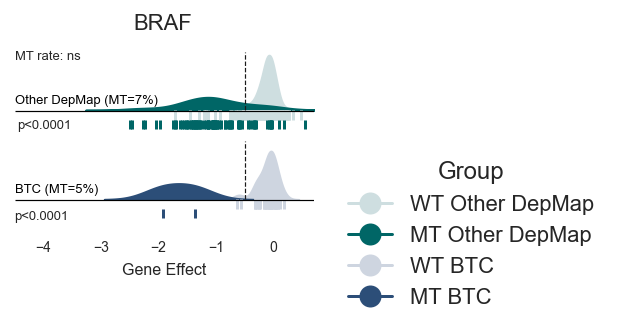

In [11]:
color_dic = {'Other DepMap':{ 'WT Other DepMap': '#CEDEE0','MT Other DepMap': '#006666'}, 'BTC':{'WT BTC': '#CED5E0','MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'BRAF (673)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

ccle_mut_df= ccle_mut_dam_df.loc[:, [gene]] | ccle_mut_hot_df.loc[:, [gene]]
ccle_other_mt = ccle_mut_df[ccle_mut_df[gene]==1]
df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_filtered_df[[gene]], ccle_other_mt, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', xlim_right=0.7, xlim_left=-4.5, aspect=3, title='BRAF', p_value=fisher_pval,  p_value_l=[p_val1, p_val2], vline_offset=0.3, border=False, rug_plot_height=.5, xtick_step=1, file_name=gene)

# BRAF Mutants

In [12]:
color_dic = {'Other MT':{'Other MT': '#CED5E0'},'Hotspot MT': {'Hotspot MT':'#2C4E78'}}
color_rug_dic = color_dic
gene = 'BRAF (673)'
btc_upset= upset_df[upset_df[gene]==1]
btc_upset

,Subtype,DepMap_ID,RNA,ERBB2 (2064),BRAF (673),IDH1 (3417),KRAS (3845),AKT1 (207),PIK3CA (5290),CTNNB1 (1499),FGFR2 (2263)
Cell_line,,,,,,,,,,,
ICC12,ICC,ACH-001838,1.0,0,1,0,0,0,0,0,0.0
ICC8,ICC,ACH-001848,1.0,0,1,0,0,1,0,0,0.0


In [13]:
maf_file = 'Main_Data/Mutations/all_cell_lines_mut_type.csv'
maf_df = MyLib.load_csv(maf_file)
braf_mutants_df = maf_df[(maf_df['HugoSymbol'] == 'BRAF') & (maf_df['ModelID'].isin(upset_df.index))]
braf_mutants_df

input_data/Main_Data/Mutations/all_cell_lines_mut_type.csv  is loaded, shape:  (127291, 7)



,HugoSymbol,VariantInfo,ModelID,EntrezGeneID,ProteinChange,CCLEDeleterious,CosmicHotspot
7153,BRAF,MISSENSE,TGBC18TKB,673.0,p.I582L,0.0,0.0
7154,BRAF,SPLICE_SITE,TGBC18TKB,673.0,p.N581T,0.0,1.0
11788,BRAF,MISSENSE,CCSW1,673.0,p.I755F,0.0,0.0
19281,BRAF,MISSENSE,ICC8,673.0,p.V600E,0.0,1.0
24612,BRAF,MISSENSE,KMCH1,673.0,p.L485W,0.0,0.0
34187,BRAF,MISSENSE,ICC12,673.0,p.V600E,0.0,1.0


In [14]:
other_braf_mts = sorted(set(braf_mutants_df['ModelID'].unique()).difference(set(btc_upset.index)))
braf_gene_effect_df = gene_effect_df.loc[braf_mutants_df['ModelID'].unique(), [gene]]
braf_gene_effect_df

Gene,BRAF (673)
Cell_line,
TGBC18TKB,-0.295059
CCSW1,-0.056798
ICC8,-1.368768
KMCH1,-0.159549
ICC12,-1.920641


Figure2/output_fig2/BRAF (673)_MUT_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

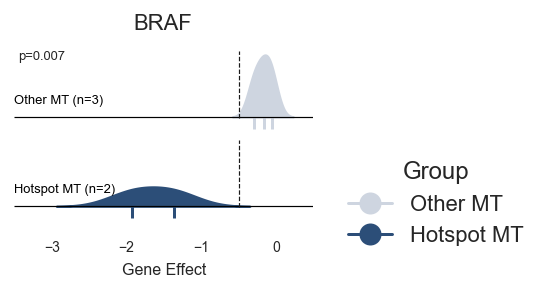

In [15]:
df, p_value = Utils.prepare_data_for_hue_plots(braf_gene_effect_df, btc_upset, label1='Hotspot MT', label2='Other MT', id_vars='Cell_line')

df = df.rename(columns={'value': 'Gene Effect'})
MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect', title='BRAF', p_value_l=[p_value], vline_offset=0.18, rug_plot_height=0.5, xlim_right=.5, xlim_left=-3.5, file_name=gene+'_MUT')

# IDH1

mutation      MT    WT
level                 
BTC            2    37
Other DepMap   8  1053
Odds Ratio: 7.114864864864865
P-value: 0.046063221573701955
There is a significant association between BTC and Other DepMap
Figure2/output_fig2/IDH1 (3417)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

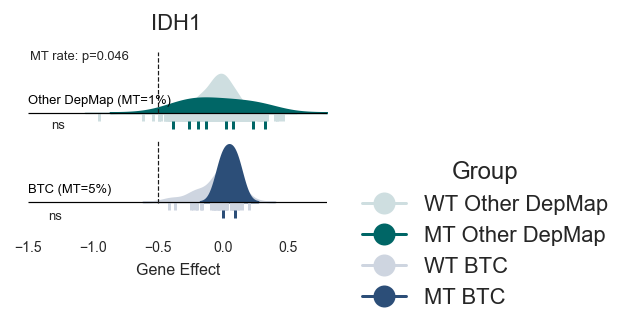

In [16]:
color_dic = {'Other DepMap':{'WT Other DepMap': '#CEDEE0', 'MT Other DepMap': '#006666'}, 'BTC':{ 'WT BTC': '#CED5E0', 'MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'IDH1 (3417)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

ccle_mut_df= ccle_mut_dam_df.loc[:, [gene]] | ccle_mut_hot_df.loc[:, [gene]]
ccle_other_mt = ccle_mut_df[ccle_mut_df[gene]==1]
df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_filtered_df[[gene]], ccle_other_mt, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', xlim_right=0.8, xlim_left=-1.5,  title='IDH1',x_pval=.17, p_value=fisher_pval, p_value_l=[p_val1, p_val2], vline_offset=0.26, dist_alpha=1, rug_plot_height=0.7, xtick_step=.5, file_name=gene)

# KRAS

mutation       MT   WT
level                 
BTC            13   26
Other DepMap  150  911
Odds Ratio: 3.0366666666666666
P-value: 0.004216352743185979
There is a significant association between BTC and Other DepMap
Figure2/output_fig2/KRAS (3845)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

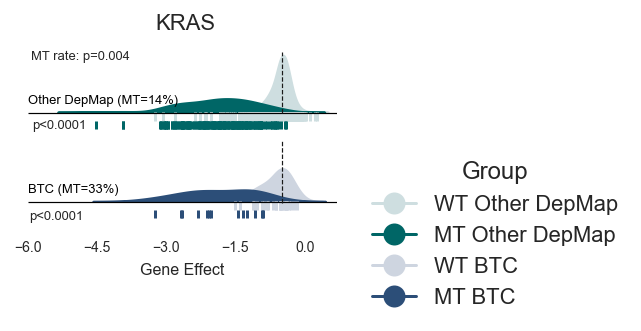

In [17]:
color_dic = {'Other DepMap':{ 'WT Other DepMap': '#CEDEE0','MT Other DepMap': '#006666'}, 'BTC':{'WT BTC': '#CED5E0','MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'KRAS (3845)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

ccle_mut_df= ccle_mut_dam_df.loc[:, [gene]] | ccle_mut_hot_df.loc[:, [gene]]
ccle_other_mt = ccle_mut_df[ccle_mut_df[gene]==1]
df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_filtered_df[[gene]], ccle_other_mt, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', rug_plot_height=0.3,  xlim_left=-6, xlim_right=0.7, xtick_step=1.5, title='KRAS', x_pval=.17, p_value=fisher_pval, p_value_l=[p_val1, p_val2], vline_offset=0.26, file_name=gene, aspect=3.5)

In [18]:
btc_upset

,Subtype,DepMap_ID,RNA,ERBB2 (2064),BRAF (673),IDH1 (3417),KRAS (3845),AKT1 (207),PIK3CA (5290),CTNNB1 (1499),FGFR2 (2263)
Cell_line,,,,,,,,,,,
SNU869,AC,ACH-000182,1.0,0,0,0,1,0,1,1,0.0
TGBC52TKB,AC,ACH-001862,1.0,0,0,0,1,0,0,0,0.0
EGI1,ECC,ACH-001494,1.0,0,0,0,1,0,0,0,0.0
KKU100,ECC,ACH-001536,1.0,0,0,0,1,0,0,0,0.0
ECC4,ECC,ACH-001843,1.0,0,0,0,1,0,0,1,0.0
CCC5,ECC,ACH-002647,NaN,0,0,0,1,0,0,0,0.0
NOZ,GBC,ACH-001607,1.0,0,0,0,1,0,0,0,0.0
G415,GBC,ACH-001850,1.0,0,0,0,1,0,0,0,0.0
HUCCT1,ICC,ACH-000976,1.0,0,0,0,1,0,0,0,0.0


# PIK3CA

mutation       MT   WT
level                 
BTC             2   37
Other DepMap  108  953
Odds Ratio: 0.476976976976977
P-value: 0.41956193246671614
There is no significant association between BTC and Other DepMap
Figure2/output_fig2/PIK3CA (5290)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

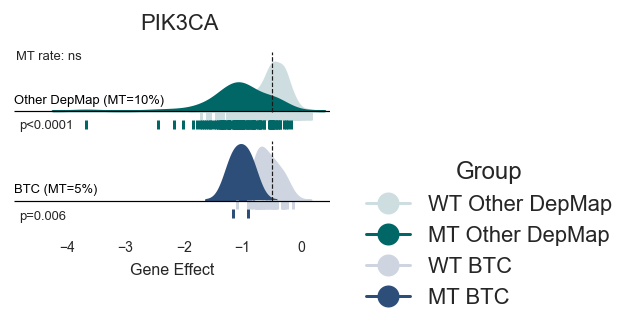

In [19]:
color_dic = {'Other DepMap':{ 'WT Other DepMap': '#CEDEE0','MT Other DepMap': '#006666'}, 'BTC':{'WT BTC': '#CED5E0','MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'PIK3CA (5290)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

ccle_mut_df = ccle_mut_dam_df.loc[:, [gene]] | ccle_mut_hot_df.loc[:, [gene]]
ccle_other_mt = ccle_mut_df[ccle_mut_df[gene]==1]
df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_filtered_df[[gene]], ccle_other_mt, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', rug_plot_height=0.3,  xlim_left=-4.9, xlim_right=0.5, aspect=4, title='PIK3CA',x_pval=.11, p_value=fisher_pval, p_value_l=[p_val1, p_val2], vline_offset=0.28, xtick_step=1, file_name=gene)

# CTNNB1

mutation      MT    WT
level                 
BTC            4    35
Other DepMap  20  1041
Odds Ratio: 5.948571428571428
P-value: 0.008601783090213491
There is a significant association between BTC and Other DepMap
Figure2/output_fig2/CTNNB1 (1499)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

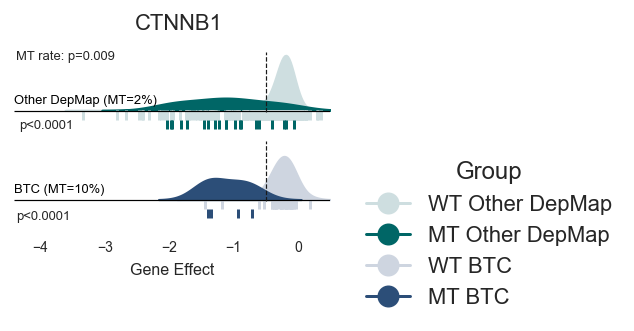

In [20]:
color_dic = {'Other DepMap':{ 'WT Other DepMap': '#CEDEE0','MT Other DepMap': '#006666'}, 'BTC':{'WT BTC': '#CED5E0','MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'CTNNB1 (1499)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

ccle_mut_df = ccle_mut_dam_df.loc[:, [gene]] | ccle_mut_hot_df.loc[:, [gene]]
ccle_other_mt = ccle_mut_df[ccle_mut_df[gene]==1]
df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_filtered_df[[gene]], ccle_other_mt, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', rug_plot_height=0.4,  xlim_left=-4.4, xlim_right=0.5, aspect=4, title='CTNNB1', x_pval=.16, p_value=fisher_pval, p_value_l=[p_val1, p_val2], vline_offset=0.28, xtick_step=1, file_name=gene)

# ERBB2

For ERBB2 we consider both the mutation and the copy number amplification values. There are two cell lines:
TGBC18TKB:   -1.937256 (Hot MT and Gain)
TKKK:        -1.131098 (Gain)

Figure2/output_fig2/ERBB2 (2064)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

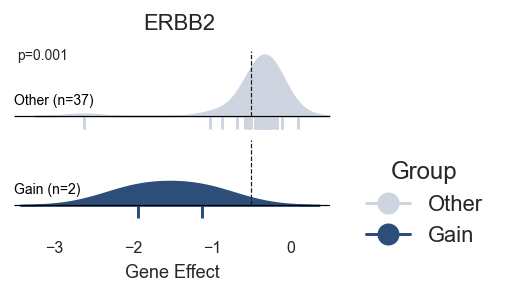

In [21]:
color_dic = {'Other':{'Other': '#CED5E0'},'Gain': {'Gain':'#2C4E78'}}
color_rug_dic = color_dic
gene = 'ERBB2 (2064)'

btc_upset= upset_df[upset_df[gene]==1]
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='Gain', label2='Other', id_vars='Cell_line')
df = df.rename(columns={'value': 'Gene Effect'})
MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect', aspect=4, title='ERBB2', p_value_l=[p_value], vline_offset=0.2, rug_plot_height=0.3, xlim_right=.5, xlim_left=-3.5, xtick_step=1, levels_fontsize=7, label_fontsize=9, tick_fontsize=8,  file_name=gene)

# FGFR2

In [22]:
ccle_cripsr_df.shape

(1100, 18443)

In [23]:
ccle_fusion_file = 'Additional_Data/DepMap/OmicsFusionFiltered.csv'
ccle_fusion_df = MyLib.load_csv(ccle_fusion_file)
ccle_fusion_filtered_df = ccle_fusion_df[ccle_fusion_df['ModelID'].isin(ccle_cripsr_df.index)]
print(ccle_fusion_filtered_df['ModelID'].nunique())
ccle_fusion_filtered_df = ccle_fusion_filtered_df[~ccle_fusion_filtered_df['ModelID'].isin(upset_df['DepMap_ID'])]
ids_with_fusion_l = ccle_fusion_filtered_df['ModelID'].unique().tolist()
print('Other DepMap samples with Fusion data: ', len(ids_with_fusion_l))
ccle_cripsr_with_fusion_df = ccle_cripsr_filtered_df.loc[ids_with_fusion_l]
ccle_cripsr_with_fusion_df.shape

input_data/Additional_Data/DepMap/OmicsFusionFiltered.csv  is loaded, shape:  (33328, 17)

1025
Other DepMap samples with Fusion data:  986


(986, 18443)

In [24]:
ccle_fusion_filtered_df[['left', 'right']] = ccle_fusion_filtered_df['FusionName'].str.split('--', expand=True)
ccle_fusion_filtered_df = ccle_fusion_filtered_df[['ModelID', 'FusionName', 'left', 'right']]
ccle_fusion_filtered_df = ccle_fusion_filtered_df[(ccle_fusion_filtered_df['left'] == 'FGFR2')|(ccle_fusion_filtered_df['right'] == 'FGFR2')].copy()
ccle_fusion_filtered_df.set_index('ModelID', drop=True, inplace=True)
ccle_fusion_filtered_df = ccle_fusion_filtered_df[~ccle_fusion_filtered_df.index.duplicated(keep='first')]
ccle_fusion_filtered_df

,FusionName,left,right
ModelID,,,
ACH-000491,FGFR2--COL14A1,FGFR2,COL14A1
ACH-000012,FGFR2--COL14A1,FGFR2,COL14A1
ACH-000111,FGFR2--COL14A1,FGFR2,COL14A1
ACH-000863,FGFR2--COL14A1,FGFR2,COL14A1
ACH-000557,FGFR2--COL14A1,FGFR2,COL14A1
ACH-001396,FGFR2--ACADSB,FGFR2,ACADSB
ACH-000793,FGFR2--ULK4,FGFR2,ULK4
ACH-000581,FGFR2--PLPP4,FGFR2,PLPP4
ACH-001819,PVT1--FGFR2,PVT1,FGFR2


There are 9 Mutant non-btc cell lines in other DepMap

In [25]:
gene_effect_df.shape

(39, 17787)

mutation      MT   WT
level                
BTC            4   35
Other DepMap   9  977
Odds Ratio: 12.406349206349207
P-value: 0.0010018232960831764
There is a significant association between BTC and Other DepMap
Figure2/output_fig2/FGFR2 (2263)_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

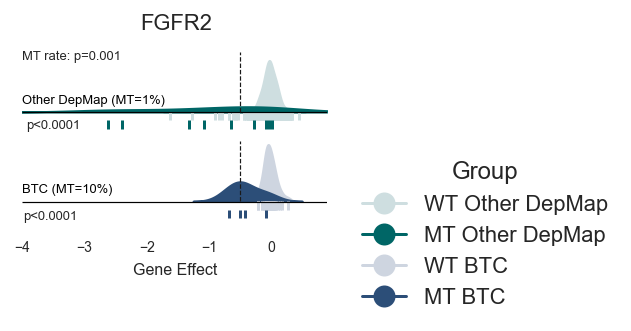

In [26]:
color_dic = {'Other DepMap':{ 'WT Other DepMap': '#CEDEE0','MT Other DepMap': '#006666'}, 'BTC':{'WT BTC': '#CED5E0','MT BTC': '#2C4E78'}}
color_rug_dic = color_dic
gene = 'FGFR2 (2263)'

btc_upset= upset_df[upset_df[gene]==1]
df1, p_val1 = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], btc_upset, label1='MT BTC', label2='WT BTC', id_vars='Cell_line')
df1['level']='BTC'

df2, p_val2 = Utils.prepare_data_for_hue_plots(ccle_cripsr_with_fusion_df[[gene]], ccle_fusion_filtered_df, label1='MT Other DepMap', label2='WT Other DepMap')
df2 = df2.rename(columns={'index':'Cell_line', 'variable':'Gene'})
df2['level']='Other DepMap'

df = pd.concat([df1, df2], axis=0)
df = df.rename(columns={'value': 'Gene Effect'})

df['mutation'] = df['Group'].apply(lambda x:'MT' if 'MT' in x else 'WT')
fisher_pval = list(Utils.fisher_test(df, x_col='level', y_col='mutation').values())[0]

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='level', col_score='Gene Effect', rug_plot_height=0.6,  xlim_left=-4, xlim_right=.9, aspect=4, title='FGFR2', x_pval=.16, p_value=fisher_pval, p_value_l=[p_val1, p_val2], vline_offset=0.28, xtick_step=1, file_name=gene)


# PTPN11

Figure2/output_fig2/PTPN11_btc_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

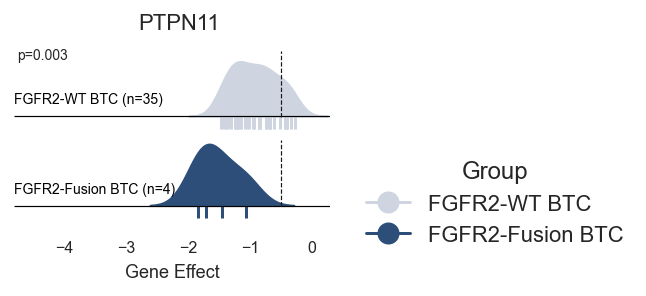

In [27]:
color_dic = {'FGFR2-WT BTC': {'FGFR2-WT BTC': '#CED5E0'}, 'FGFR2-Fusion BTC':{'FGFR2-Fusion BTC': '#2C4E78'}}
color_rug_dic = color_dic
mut_gene = 'FGFR2 (2263)'
dep_gene = 'PTPN11 (5781)'
btc_upset= upset_df[upset_df[mut_gene]==1]
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[dep_gene]], btc_upset, label1='FGFR2-Fusion BTC', label2='FGFR2-WT BTC', id_vars='Cell_line')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-4.8, xlim_right=.3, aspect=4, title='PTPN11',  p_value_l=[p_value], vline_offset=0.19, rug_plot_height=0.2, xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='PTPN11_btc')

Figure2/output_fig2/PTPN11_other_ccle_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

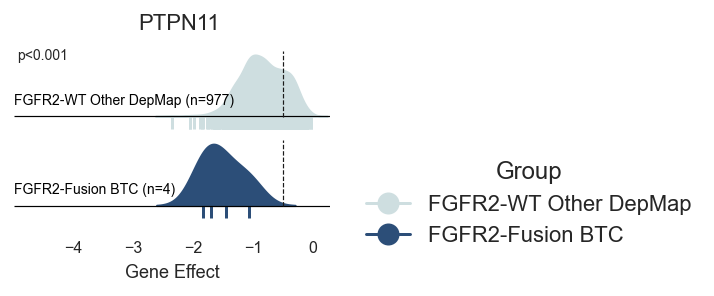

In [28]:
color_dic = {'FGFR2-WT Other DepMap': {'FGFR2-WT Other DepMap': '#CEDEE0'}, 'FGFR2-Fusion BTC':{'FGFR2-Fusion BTC': '#2C4E78'}}
color_rug_dic = color_dic
mut_gene = 'FGFR2 (2263)'
dep_gene = 'PTPN11 (5781)'
btc_upset= upset_df[upset_df[mut_gene]==1]
other_ccle_wt = ccle_cripsr_with_fusion_df[[dep_gene]][~ccle_cripsr_with_fusion_df[[dep_gene]].index.isin(ccle_fusion_filtered_df.index)]
btc_mt = gene_effect_df[[dep_gene]][gene_effect_df[[dep_gene]].index.isin(btc_upset.index)]
temp_df = pd.concat([other_ccle_wt, btc_mt], axis=0)
df, p_value = Utils.prepare_data_for_hue_plots(temp_df, btc_upset, label1='FGFR2-Fusion BTC', label2='FGFR2-WT Other DepMap')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-4.99, xlim_right=.3, aspect=4, title='PTPN11',  p_value_l=[p_value], vline_offset=0.19, rug_plot_height=0.2, xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='PTPN11_other_ccle')

# PRMT5

In [29]:
cnv_file = 'Additional_Data/Selected_Lists/goi_cnv.csv'
cnv_df = MyLib.load_csv(cnv_file)
cell_lines_dic = Utils.get_cell_lines_by_cnv(cnv_df, upset_df, 'MTAP')
for k in cell_lines_dic:
    if k=='Homo_loss':
        print(f'CNV: {k}, cell: {cell_lines_dic[k]}')
        upset_df.loc[cell_lines_dic[k], 'MTAP (4507)'] = 1

input_data/Additional_Data/Selected_Lists/goi_cnv.csv  is loaded, shape:  (74, 4)

CNV: Homo_loss, cell: ['CCC5', 'EGI1', 'GB2', 'ICC8', 'KKU100', 'RBE', 'TFK1', 'YSCCC']


In [30]:
cnv_file = 'Additional_Data/Selected_Lists/goi_cnv.csv'
cnv_df = MyLib.load_csv(cnv_file)
cell_lines_dic = Utils.get_cell_lines_by_cnv(cnv_df, upset_df, 'MTAP')
for k in cell_lines_dic:
    if k=='Homo_loss':
        print(f'CNV: {k}, cell: {cell_lines_dic[k]}')
        upset_df.loc[cell_lines_dic[k], 'MTAP (4507)'] = 1

input_data/Additional_Data/Selected_Lists/goi_cnv.csv  is loaded, shape:  (74, 4)

CNV: Homo_loss, cell: ['CCC5', 'EGI1', 'GB2', 'ICC8', 'KKU100', 'RBE', 'TFK1', 'YSCCC']


Figure2/output_fig2/PRMT5_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

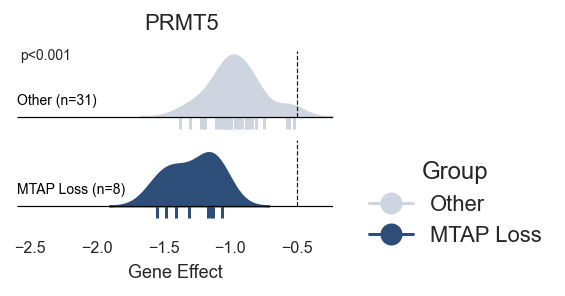

In [31]:
color_dic = {'Other': {'Other': '#CED5E0'}, 'MTAP Loss':{'MTAP Loss': '#2C4E78'}}
color_rug_dic = color_dic
mut_gene = 'MTAP (4507)'
dep_gene = 'PRMT5 (10419)'
btc_upset= upset_df[upset_df[mut_gene]==1]
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[dep_gene]], btc_upset, label1='MTAP Loss', label2='Other', id_vars='Cell_line')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-2.6, xlim_right=-.23, aspect=4, title='PRMT5',  p_value_l=[p_value], vline_offset=0.19, rug_plot_height=0.4, xtick_step=0.5, levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='PRMT5')